# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [9]:
import numpy as np

### Simulation du lancé de dé

In [10]:
def Roll():
    return int(np.random.choice(range(1,7),1))
#avoir aleatoirement un nb entre 1 et 6

In [11]:
Roll()

1

### Compléter le code et commenter

In [12]:
A=0 #prison
NA=0 #compteur / nombre de coups
S=10 #position cible
temp=Roll()
NA+=1
print(NA,temp)
while temp!=6:  #repeter {la fonction Roll()} jusqu'a avoir 6 avec le nombre de coups avance avec chaque lance
    temp=Roll()
    NA+=1
    print(NA,temp)
A=1
print('sortie de la prison apres {} coups'.format(NA))

while(A<S): #repeter jusqu'a le somme de prisons = la position cible {S=10}
    temp=Roll()
    if temp+A<S:
        NA+=1
        A+=temp
        print(NA,temp,A)
    elif temp+A>S:
        NA+=1
        print(NA,temp,A)
    else:
        A=S
        NA+=1
        print(NA,temp,A)
        
        


1 5
2 4
3 4
4 3
5 6
sortie de la prison apres 5 coups
6 6 7
7 5 7
8 2 9
9 6 9
10 1 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [13]:
def sim(S):
    A=0 #prison
    NA=0 #compteur
    temp=Roll()
    NA+=1
    while temp!=6:
        temp=Roll()
        NA+=1
    A=1
    while(A<S):
        temp=Roll()
        if temp+A<S:
            NA+=1
            A+=temp
        elif temp+A>S:
            NA+=1
        else:
            A=S
            NA+=1
    return NA # la fonction renvoie le nombre de coups 'NA' jusqu'à atteindre la position cible 'S' {S modifiable}
        
    

In [14]:
sim(20)

8

In [15]:
#simulation 10000 fois n=30
L=[sim(30) for i in range(10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de X_30 = {}'.format(Moy))
# calculer la moyenne de coups jusqu'à atteindre une position cible de 'S' {30} pour 10000 simulation

estimation de la moyenne de X_30 = 19.0355


### Simulation de $10^5$  scénario 

In [19]:
x=list(range(10,20)) # x est une liste de 10 nombre aleatoire de rang(20)
x
y=[sum([sim(u) for i in range(10000)])/10000 for u in x] 
# y est une liste de dimension 10 contient la moyenne de coups pour chaque valeur de 'x'

In [20]:
import matplotlib.pyplot as plt

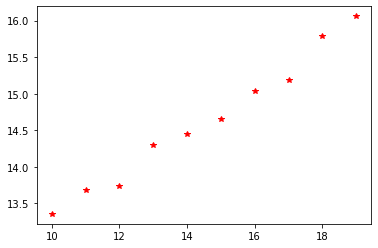

In [21]:
plt.plot(x,y,'*r')
plt.show() #affichage de courbe d'abscisse 'x' et d'ordonnée 'y'

In [22]:
#pip install scipy

In [23]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [24]:
slope  #pente

0.29619272727272733

In [25]:
intercept  #intercepter

10.329405454545455

In [26]:
yy=[slope *u +intercept for u in x]

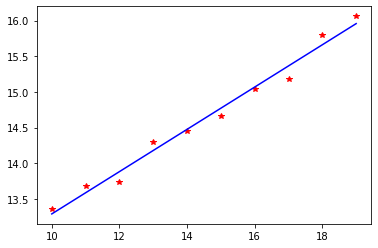

In [28]:
plt.plot(x,y,'*r',x,yy,'-b')

E(X_n)~=0.29619272727272733*n+10.329405454545455
 - somme de n fois pente et l'intercepter